In [ ]:
# Step 1: Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Step 2: Load Dataset

data = pd.read_csv('/content/train.csv')

print("Full dataset shape:", data.shape)

# Step 3: Sample Data for Speed
data = data.sample(frac=0.2, random_state=42)  # 20% for faster training
print("Sampled dataset shape:", data.shape)

# Step 4: Preprocessing

# Convert timestamp to datetime and extract features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day

# Drop original timestamp
data = data.drop('timestamp', axis=1)

# Encode turbine_id
le = LabelEncoder()
data['turbine_id'] = le.fit_transform(data['turbine_id'])

# Fill missing values with mean
data = data.fillna(data.mean())

# Define features and target
X = data.drop("Target", axis=1)
y = data["Target"]

Full dataset shape: (640146, 16)
Sampled dataset shape: (128029, 16)


In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for LR & NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Train Models (Optimized)

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# --- Random Forest  ---
rf = RandomForestRegressor(
    n_estimators=50,  # fewer trees
    max_depth=15,     # limit depth to reduce overfitting & time
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Neural Network (MLP) ---
mlp = MLPRegressor(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Step 6: Evaluation (Optimized)
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE
    mae = mean_absolute_error(y_true, y_pred)          # MAE
    r2 = r2_score(y_true, y_pred)                      # R² score
    print(f"{name} → RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Neural Network (MLP)", y_test, y_pred_mlp)


Linear Regression → RMSE: 1.951, MAE: 1.361, R²: 0.442
Random Forest → RMSE: 0.867, MAE: 0.599, R²: 0.890
Neural Network (MLP) → RMSE: 1.252, MAE: 0.890, R²: 0.770


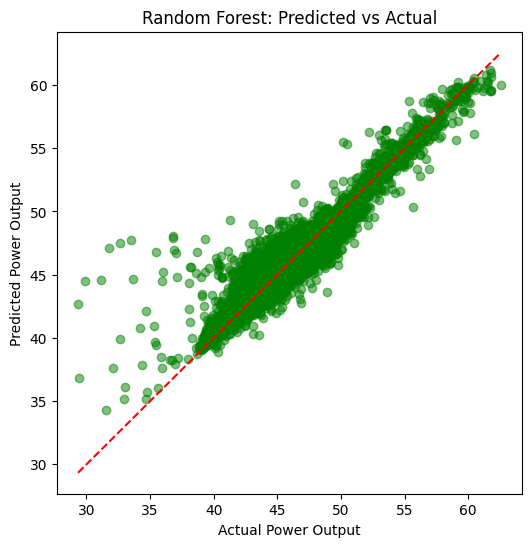

/tmp/ipython-input-2469332719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


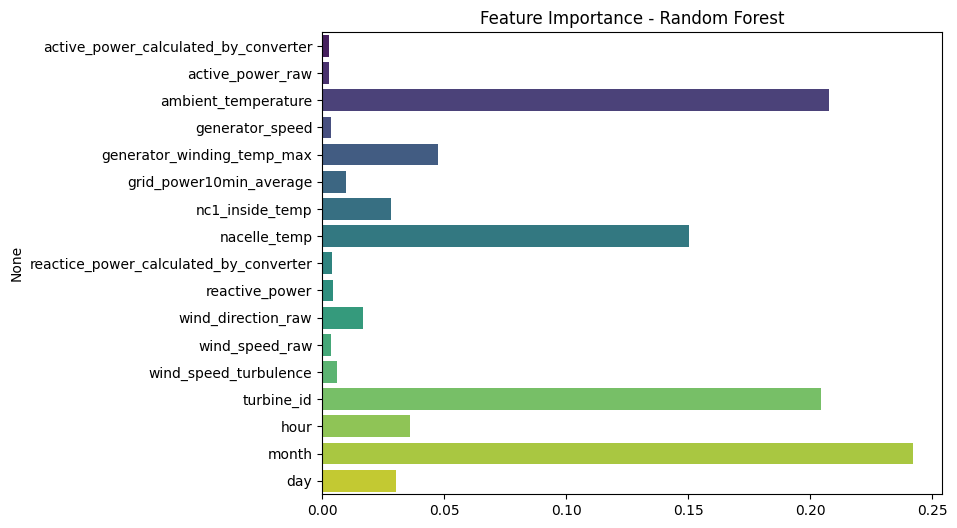

In [ ]:

# Step 7: Visualization

# Predicted vs Actual (Random Forest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()
